<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ANNOY-library" data-toc-modified-id="ANNOY-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANNOY library</a></span></li><li><span><a href="#Full-Python-API" data-toc-modified-id="Full-Python-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full Python API</a></span></li><li><span><a href="#Note:--Sparse-matrices-are-not-supported" data-toc-modified-id="Note:--Sparse-matrices-are-not-supported-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Note:  Sparse matrices are not supported</a></span></li><li><span><a href="#Example-with-20newsgroups-dataset" data-toc-modified-id="Example-with-20newsgroups-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example with 20newsgroups dataset</a></span><ul class="toc-item"><li><span><a href="#Function-to-test-the-quality-of-the-Approximate-Nearest-Neighbors" data-toc-modified-id="Function-to-test-the-quality-of-the-Approximate-Nearest-Neighbors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Function to test the quality of the Approximate Nearest Neighbors</a></span></li><li><span><a href="#Evaluating-quality-of-the-retrieval-of-the-K-NN" data-toc-modified-id="Evaluating-quality-of-the-retrieval-of-the-K-NN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluating quality of the retrieval of the K NN</a></span></li><li><span><a href="#Evaluating-performance" data-toc-modified-id="Evaluating-performance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Evaluating performance</a></span></li></ul></li></ul></div>

## ANNOY library


Full Python API
---------------

* ``AnnoyIndex(f, metric)`` returns a new index that's read-write and stores vector of ``f`` dimensions. Metric can be ``"angular"``, ``"euclidean"``, ``"manhattan"``, ``"hamming"``, or ``"dot"``.


* ``a.add_item(i, v)`` adds item ``i`` (any nonnegative integer) with vector ``v``. Note that it will allocate memory for ``max(i)+1`` items.


* ``a.build(n_trees, n_jobs=-1)`` builds a forest of ``n_trees`` trees. More trees gives higher precision when querying. After calling ``build``, no more items can be added. ``n_jobs`` specifies the number of threads used to build the trees. ``n_jobs=-1`` uses all available CPU cores.


* ``a.save(fn, prefault=False)`` saves the index to disk and loads it (see next function). After saving, no more items can be added.


* ``a.load(fn, prefault=False)`` loads (mmaps) an index from disk. If `prefault` is set to `True`, it will pre-read the entire file into memory (using mmap with `MAP_POPULATE`). Default is `False`.


* ``a.unload()`` unloads.


* ``a.get_nns_by_item(i, n, search_k=-1, include_distances=False)`` returns the ``n`` closest items. During the query it will inspect up to ``search_k`` nodes which defaults to ``n_trees * n`` if not provided. ``search_k`` gives you a run-time tradeoff between better accuracy and speed. If you set ``include_distances`` to ``True``, it will return a 2 element tuple with two lists in it: the second one containing all corresponding distances.


* ``a.get_nns_by_vector(v, n, search_k=-1, include_distances=False)`` same but query by vector ``v``.


* ``a.get_item_vector(i)`` returns the vector for item ``i`` that was previously added.


* ``a.get_distance(i, j)`` returns the distance between items ``i`` and ``j``. NOTE: this used to return the *squared* distance, but has been changed as of Aug 2016.


* ``a.get_n_items()`` returns the number of items in the index.


* ``a.get_n_trees()`` returns the number of trees in the index.


* ``a.on_disk_build(fn)`` prepares annoy to build the index in the specified file instead of RAM (execute before adding items, no need to save after build)


* ``a.set_seed(seed)`` will initialize the random number generator with the given seed.  Only used for building up the tree, i. e. only necessary to pass this before adding the items.  Will have no effect after calling `a.build(n_trees)` or `a.load(fn)`.



In [1]:
from annoy import AnnoyIndex
import random

f = 40
t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed
for i in range(1000):
#    import pdb;pdb.set_trace()
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)


In [2]:
type(t)

annoy.Annoy

In [3]:
t.build(n_trees = 10)
t.save('test.ann')

True

In [4]:
u = AnnoyIndex(f, 'angular')

# super fast, will just mmap the file
u.load('test.ann')

# will find the 1000 nearest neighbors
print(u.get_nns_by_item(0, 100)) 


[0, 39, 234, 474, 368, 798, 35, 307, 439, 922, 799, 841, 847, 301, 667, 873, 614, 987, 826, 861, 726, 535, 777, 137, 845, 904, 712, 690, 480, 643, 881, 268, 700, 247, 298, 634, 461, 916, 925, 563, 53, 456, 16, 81, 884, 688, 828, 579, 741, 498, 330, 772, 13, 350, 846, 364, 43, 159, 440, 735, 42, 7, 236, 293, 400, 184, 755, 973, 534, 729, 937, 852, 857, 201, 475, 112, 895, 198, 244, 919, 304, 523, 871, 547, 918, 129, 717, 367, 565, 842, 935, 780, 964, 142, 627, 968, 263, 527, 944, 47]


## Note:  Sparse matrices are not supported

In [6]:
import scipy
from scipy import sparse
from collections.abc import Iterable

def check_iterable(input_vec):
    if isinstance(input_vec, Iterable):
        print(f"Input {type(input_vec)} it is iterable")

X_dense = np.random.rand(100,1000)        
X_sp = scipy.sparse.csr_matrix(X_dense)

check_iterable(X_dense)
check_iterable(X_sp)

def build_annoy_index(data, n_trees):
    print(f"Building annoy index with data type {type(data)}")
    n_examples, n_features = data.shape
    t = AnnoyIndex(n_features, 'angular')  
    
    for m,x in enumerate(range(n_examples)):
        t.add_item(m, data[m,:])

    t.build(n_trees = n_trees) # 10 trees
    t.save(f'AIndex_Nexamples={n_examples}=_Ntrees={n_trees}.ann')


n_trees = 10
build_annoy_index(X_dense[0:20], n_trees)

# The following example with X_sp does not work
#build_annoy_index(X_sp[0:20], n_trees)

Input <class 'numpy.ndarray'> it is iterable
Input <class 'scipy.sparse.csr.csr_matrix'> it is iterable
Building annoy index with data type <class 'numpy.ndarray'>


## Example with 20newsgroups dataset

In [77]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

n_features = 1000
newsgroups_train = fetch_20newsgroups(subset='train')
print(f'Number of examples: {len(newsgroups_train.data)}')


document_embedding = CountVectorizer(max_features=n_features)
X_tr = document_embedding.fit_transform(newsgroups_train.data)
X_tr_dense = X_tr.toarray()
print(f'Data shape: {X_tr_dense.shape}')

Number of examples: 11314
Data shape: (11314, 1000)


We want to measure the percentage of true K-NN when we do approximate KNN when we change the parameter `n_trees`.


In [114]:
def build_annoy_index(data, n_trees, metric='euclidean', save=True):
    
    n_examples, n_features = data.shape    
    t = AnnoyIndex(n_features, metric)  
    
    for m,x in enumerate(range(n_examples)):
        t.add_item(m, data[m,:])

    t.build(n_trees = n_trees) # 10 trees
    if save:
        filename = f'AIndex_Nexamples={n_examples}_Nfeatures={n_features}_Ntrees={n_trees}_Metric={metric}.ann'
        print(f'Annoy file saved in {filename}')
        t.save(filename)
    else:
        return t

In [79]:
n_trees = 10
build_annoy_index(X_tr_dense, n_trees)

Annoy file saved in AIndex_Nexamples=11314_Nfeatures=1000_Ntrees=10_Metric=euclidean.ann


### Function to test the quality of the Approximate Nearest Neighbors

There are two approaches for querying the nearest neighbors of a vector:

- `u.get_nns_by_vector(v,K)`: Given a vector `v` and an integer `K` returns the indices of the `K` nn.


- `u.get_nns_by_item(v,K)`: Given an index `i` and an integer `K` returns the indices of the `K` nn from the fitted data.



In [85]:
n_features = 1000
K=20

In [88]:
annoy_file = 'AIndex_Nexamples=11314_Nfeatures=1000_Ntrees=10_metric=euclidean.ann'
u = AnnoyIndex(n_features, 'euclidean')

# super fast, will just mmap the file
u.load(annoy_file)

True

In [89]:
u.get_nns_by_vector(X_tr_dense[0],10)

[0, 1224, 1834, 1965, 7494, 564, 3131, 4973, 9480, 9342]

In [90]:
u.get_nns_by_item(0,10)

[0, 1224, 1834, 1965, 7494, 564, 3131, 4973, 9480, 9342]

In [91]:
def find_knn(q, X, K, dist):
    distances = dist(q, X)
    idx_sorted = np.argsort(distances)
    return idx_sorted[0:K]

In [92]:
def euclidean_dist(q, X):
    return np.linalg.norm(q-X,axis=1)

def sorted_distances(q, X, d, K):
    return np.sort(d(q,X))[0:K]

def sorted_indices(q, X, d, K):
    return np.argsort(d(q,X))[0:K]

In [93]:
m = 10
q = X_tr_dense[m,:]
find_knn(q,X_tr_dense,K=20,dist=euclidean_dist)

array([   10,  6536,  1807,  9281, 10235,  2062,  5101, 10801,   360,
        1378,  7592,  1893,  2862,  5575,  8881,  4776,    64,  5148,
        7654,  1151])

In [94]:
sorted_distances(q, X_tr_dense, euclidean_dist, K)

array([ 0.        , 10.67707825, 10.81665383, 10.86278049, 10.86278049,
       10.95445115, 10.95445115, 10.95445115, 10.95445115, 11.        ,
       11.        , 11.        , 11.        , 11.04536102, 11.04536102,
       11.04536102, 11.09053651, 11.09053651, 11.09053651, 11.09053651])

### Evaluating quality of the retrieval of the K NN

In [95]:
def jaccard_similarity(s1,s2):
    return len(s1.intersection(s2))/len(s1)

In [96]:
np.random.seed(1234)
n_items = 100
items = np.random.randint(0, n_examples, n_items)

In [97]:
K = 20
jaccard_similarities =  []
for m in items:
    q = X_tr_dense[m,:]
    nn_ids = find_knn(q,X_tr_dense, K, dist=euclidean_dist)
    approx_nn_ids = np.array(u.get_nns_by_item(m,K))
    jaccard_sim = jaccard_similarity(set(nn_ids.tolist()), set(approx_nn_ids.tolist()))
    jaccard_similarities.append( jaccard_sim)

In [98]:
np.mean(jaccard_similarities)

0.3

Since the previous loop is too long, we can use a KDTree to speed up our experiments

In [99]:
import sklearn
from sklearn import neighbors

kd_tree =  sklearn.neighbors.KDTree(X_tr_dense, p=2,leaf_size=2)

In [100]:
kdtree_distances, kdtree_nnids = kd_tree.query(np.array([q]), 20)

In [101]:
nn_distances = sorted_distances(q,X_tr_dense,euclidean_dist,K)

In [102]:
nn_distances == kdtree_distances

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

We will also get the same result with the indices

In [103]:
kdtree_nn_ids = kd_tree.query(np.array([q]), K)[1]
kdtree_nn_ids

array([[    0,   958,  1224,  1834,  1965,  7494,  2807,  8382,   564,
         5429,  4799, 11226,  3821,  8576,  8679,  4939,  2167,  4937,
          318,  4973]])

In [104]:
nn_ids = find_knn(q,X_tr_dense, K=K, dist=euclidean_dist)
nn_ids

array([    0,   958,  1224,  1834,  1965,  7494,  2807,  8382,   564,
        5429, 11226,  4799,  3821,  8576,  8679,  2167,  4939,  4937,
       10199,   318])

In [105]:
kdtree_nn_ids == nn_ids

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True, False, False,  True,
        False, False]])

In [106]:
np.mean(kdtree_nn_ids == nn_ids)

0.7

Because of the order matters in the previous example (and we don't want this) we can use the jaccard similarity

In [107]:
s1 = set(kdtree_nn_ids.tolist()[0])
s2 = set(nn_ids.tolist())

In [108]:
jaccard_similarity(s1,s2)

0.95

Note that the ids are not the same because if there are several examples within the same distance there both methods select the closest example differently

In [109]:
len(set(nn_distances)), len(nn_distances)

(13, 20)

We can repeat the exepriment now with the KDTree

In [110]:
K = 20
jaccard_similarities =  []
for m in items:
    q = X_tr_dense[[m],:]
    kdtree_nn_ids = kd_tree.query(q, K)[1]
    approx_nn_ids = np.array(u.get_nns_by_item(m,K))
    jaccard_sim = jaccard_similarity(set(kdtree_nn_ids.tolist()[0]), set(approx_nn_ids.tolist()))
    jaccard_similarities.append( jaccard_sim)

In [111]:
np.mean(jaccard_similarities)

0.3500000000000001

### Evaluating performance

In [155]:
n_examples, n_features = X_tr_dense.shape
np.random.seed(1234)
n_items = 100
items = np.random.randint(0, n_examples, n_items)
n_trees_list = [5,10,20,30,50,100,150,300,500,1000]
K = 20

In [147]:
n_examples, n_features, K

(11314, 1000, 20)

In [205]:
jaccard_similarities = {}
query_times = {}

for n_trees in n_trees_list:
    print(f"Computing with K={K}, n_trees={n_trees}, n_examples={n_examples}, n_features={n_features}")
    annoy_knn = build_annoy_index(X_tr_dense, n_trees, metric='euclidean', save=False)
    jaccard_sims = []
    
    # time the approximate nearest neighbors retrieval 
    q_time = %timeit -o annoy_knn.get_nns_by_item(items[0],K)
    query_times[n_trees] = q_time.average
    
    for m in items:
        q = X_tr_dense[m,:]
        nn_ids = find_knn(q, X_tr_dense, K, dist=euclidean_dist)
        approx_nn_ids = np.array(annoy_knn.get_nns_by_item(m,K))
        jaccard_sim = jaccard_similarity(set(nn_ids.tolist()), set(approx_nn_ids.tolist()))
        jaccard_sims.append(jaccard_sim)

    jaccard_similarities[n_trees] = np.mean(jaccard_sims)

Computing with K=20, n_trees=5, n_examples=11314, n_features=1000
147 µs ± 6.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Computing with K=20, n_trees=10, n_examples=11314, n_features=1000
202 µs ± 8.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Computing with K=20, n_trees=20, n_examples=11314, n_features=1000
192 µs ± 9.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Computing with K=20, n_trees=30, n_examples=11314, n_features=1000
129 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Computing with K=20, n_trees=50, n_examples=11314, n_features=1000
400 µs ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Computing with K=20, n_trees=100, n_examples=11314, n_features=1000
595 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Computing with K=20, n_trees=150, n_examples=11314, n_features=1000
846 µs ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Computing with K=20, n_t

In [215]:
import pandas as pd
df_results = pd.DataFrame([query_times,jaccard_similarities]).T

In [256]:
df_results.columns = ["query_time_K", "jaccard_similarity_top_K"]
df_results.index.name = ('n_trees')
df_results

,query_time_K,jaccard_similarity_top_K
n_trees,,
5,0.000147,0.4255
10,0.000202,0.4250
20,0.000192,0.4600
30,0.000129,0.4700
50,0.000400,0.5685
100,0.000595,0.6475
150,0.000846,0.6795
300,0.001321,0.7465
500,0.001820,0.7910


<AxesSubplot:title={'center':'query time (ms)'}, xlabel='Number trees'>

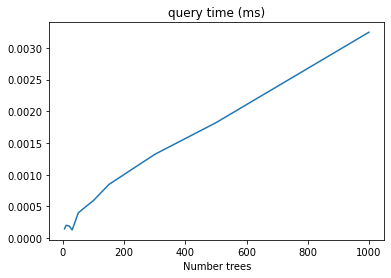

In [258]:
df_results["query_time_K"].plot(title="query time (ms)",xlabel="Number trees")

<AxesSubplot:title={'center':'Jaccard agreement top K'}, xlabel='Number trees'>

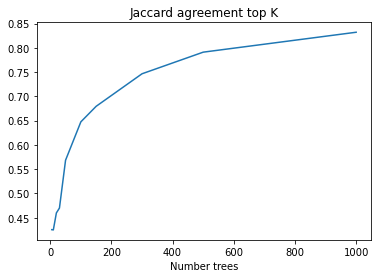

In [259]:
df_results["jaccard_similarity_top_K"].plot(title="Jaccard agreement top K",xlabel="Number trees")